In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")

# Display first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
# Use Label Encoding for simplicity
label_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [8]:
# Store features and target
X = df.drop(['math score'], axis=1)
y = df['math score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# View shape
print("X shape:", X_scaled.shape)


X shape: (1000, 7)


In [9]:
# Define features and target again for clarity
features = df.drop(columns=['math score'])  # All other columns
target = df['math score']  # What we want to predict

print("Selected Features:\n", features.columns)


Selected Features:
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')


In [10]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)


In [11]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original shape:", X_train.shape)
print("Polynomial shape:", X_train_poly.shape)


Original shape: (800, 7)
Polynomial shape: (800, 35)


In [12]:
# Train Multilinear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)


In [13]:
# Train Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data (polynomial-transformed)
y_pred_poly = poly_model.predict(X_test_poly)


In [17]:
from math import sqrt

# Manually calculate RMSE
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Multilinear Regression:")
print(f"RMSE: {rmse_linear:.2f}")
print(f"MAE: {mae_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}")


Multilinear Regression:
RMSE: 5.32
MAE: 4.13
R² Score: 0.88


In [18]:
# Manually calculate RMSE
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"R² Score: {r2_poly:.2f}")


Polynomial Regression:
RMSE: 5.64
MAE: 4.40
R² Score: 0.87


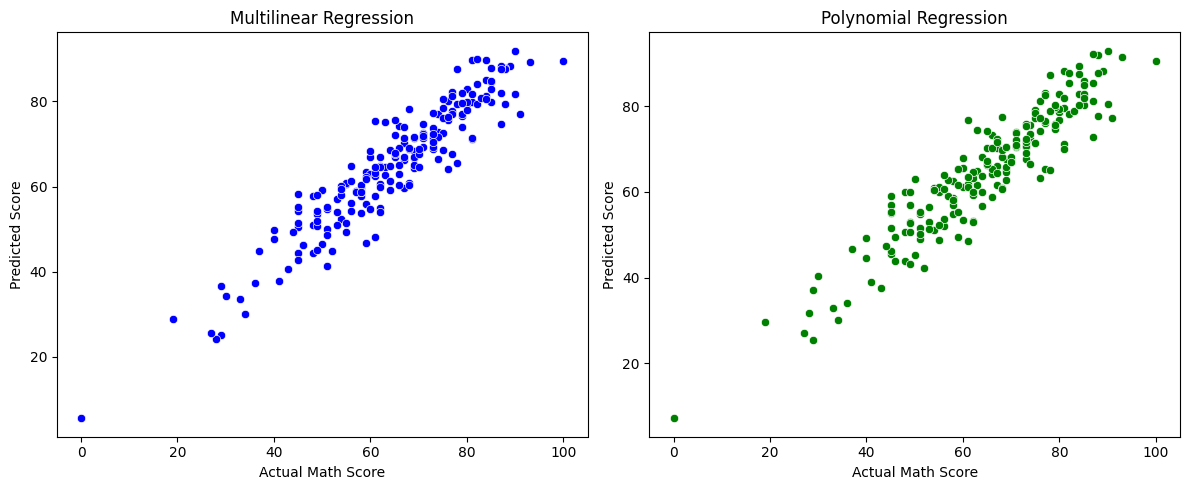

In [16]:
# Plot: Actual vs Predicted (Linear)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Score")
plt.title("Multilinear Regression")

# Plot: Actual vs Predicted (Polynomial)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_poly, color='green')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Score")
plt.title("Polynomial Regression")

plt.tight_layout()
plt.show()


PART 2

In [23]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Upload file
from google.colab import files
df = pd.read_csv("/content/sample_data/Social_Network_Ads.csv")
df.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
# Drop User ID
df.drop("User ID", axis=1, inplace=True)


In [25]:
# Label Encode Gender and Purchased
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0 (or vice versa)
df['Purchased'] = le.fit_transform(df['Purchased'])

df.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
# Feature matrix and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


In [27]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Dictionary to store models
knn_models = {}

# Loop through different values of k
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models[k] = knn


In [29]:
# Example: Predictions with k=5
y_pred_knn5 = knn_models[5].predict(X_test)


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Gini Criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

# Entropy Criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [32]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results")
    print("-" * 30)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


In [34]:
print("Unique predictions from Naive Bayes:", np.unique(y_pred_nb))


Unique predictions from Naive Bayes: [32 35 37 38 41 42 43 45 46 47 48 49 51 61 70 72 73 74 78 79 84 85 89 90
 93 94 95 96 97 99]


In [35]:
# Make sure this was used:
y_pred_nb = nb_model.predict(X_test)


In [36]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results")
    print("-" * 30)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='binary'))
    print("Recall   :", recall_score(y_true, y_pred, average='binary'))
    print("F1 Score :", f1_score(y_true, y_pred, average='binary'))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


In [37]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results")
    print("-" * 30)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_true, y_pred, average='weighted'))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()



📊 Gaussian Naive Bayes Results
------------------------------
Accuracy : 0.016
Precision: 0.017916666666666664
Recall   : 0.016
F1 Score : 0.009485972850678733


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 KNN (k=3) Results
------------------------------
Accuracy : 0.012
Precision: 0.015243589743589742
Recall   : 0.012
F1 Score : 0.011478260869565217


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 KNN (k=5) Results
------------------------------
Accuracy : 0.04
Precision: 0.03157983193277311
Recall   : 0.04
F1 Score : 0.0335018315018315


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 KNN (k=7) Results
------------------------------
Accuracy : 0.032
Precision: 0.03442483660130719
Recall   : 0.032
F1 Score : 0.029987114845938377


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Decision Tree (Gini) Results
------------------------------
Accuracy : 0.04
Precision: 0.044730158730158724
Recall   : 0.04
F1 Score : 0.03709064269064269


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Decision Tree (Entropy) Results
------------------------------
Accuracy : 0.06
Precision: 0.07609706959706959
Recall   : 0.06
F1 Score : 0.06275652768284347


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


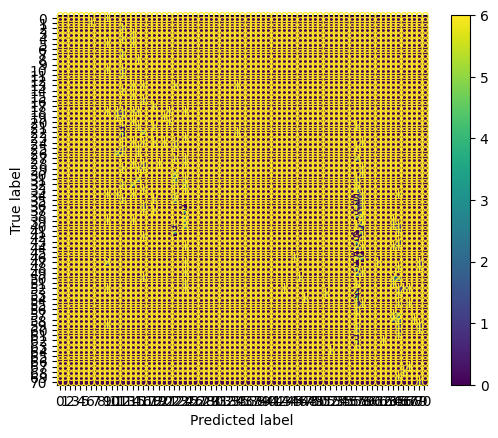

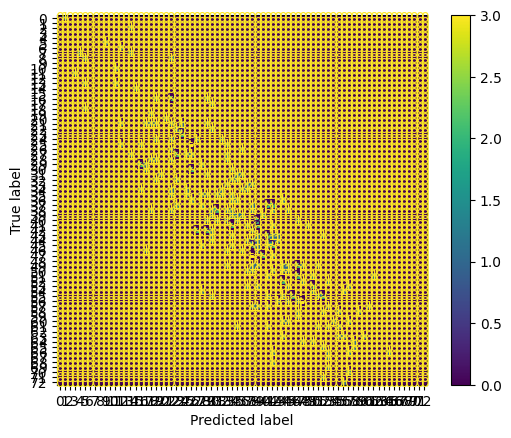

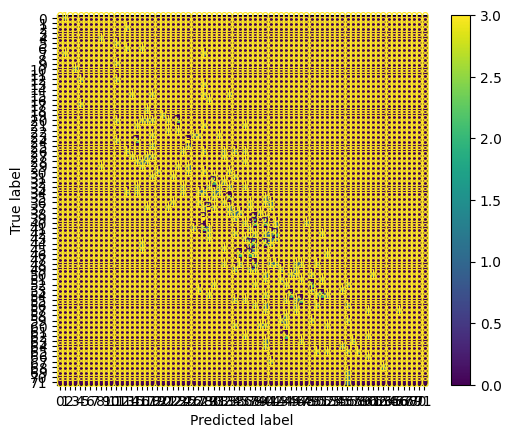

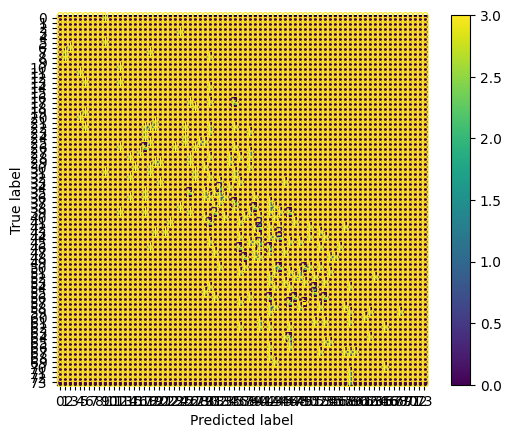

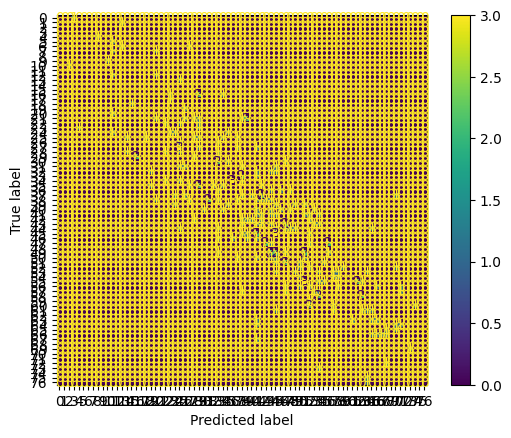

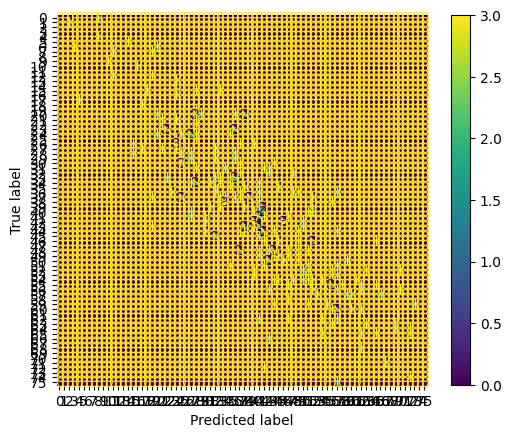

In [38]:
# Naive Bayes
evaluate_model("Gaussian Naive Bayes", y_test, y_pred_nb)

# KNN for k=3, 5, 7
for k in [3, 5, 7]:
    y_pred_knn = knn_models[k].predict(X_test)
    evaluate_model(f"KNN (k={k})", y_test, y_pred_knn)

# Decision Tree - Gini
evaluate_model("Decision Tree (Gini)", y_test, y_pred_gini)

# Decision Tree - Entropy
evaluate_model("Decision Tree (Entropy)", y_test, y_pred_entropy)
